# Mini-Projeto MLP: Classificação de Sobreviventes do Titanic

## Grupo
* Amanda Cristina (acfml)
* João Marcos (jmav)
* Mateus Galdino (mglg)
* Matheus Augusto (mams4)
* Rodrigo Rossiter Ladvocat Cintra (rrlc)

## Visão Geral do Projeto
Este notebook documenta o desenvolvimento de um modelo de Machine Learning para prever a sobrevivência de passageiros do navio Titanic. O desafio consiste em utilizar Redes Neurais Artificiais, especificamente o modelo Multilayer Perceptron (MLP), para classificar os passageiros com base em seus atributos, como classe, idade e sexo.

### Objetivos Específicos
- **Análise Exploratória:** Investigar o dataset para extrair insights e compreender as relações entre as variáveis.
- **Engenharia de Atributos:** Realizar o tratamento de dados faltantes, a codificação de variáveis categóricas (como 'sexo' e 'porto de embarque') e a normalização de variáveis numéricas.
- **Modelagem com MLP:** Construir, treinar e validar um classificador MLP, experimentando diferentes arquiteturas e hiperparâmetros.
- **Avaliação de Desempenho:** Avaliar a performance final do modelo utilizando métricas como acurácia, precisão, recall e matriz de confusão.

### Metodologia Aplicada
A abordagem será dividida nas seguintes fases:
1.  **Carregamento e Análise dos Dados:** Importação das bibliotecas e do dataset, seguida por uma exploração inicial.
2.  **Pré-processamento:** Limpeza e transformação dos dados para garantir que estejam prontos para o treinamento.
3.  **Definição e Treinamento do Modelo:** Configuração da arquitetura do MLP e execução do processo de treinamento.
4.  **Avaliação e Conclusão:** Análise dos resultados obtidos no conjunto de teste e apresentação das conclusões do projeto.

## Importando bibliotecas

Explicar as bibs que estamos usando e o que elas fazem!!!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning




## **Parte 1 - Análise dos Dados**

O dataset utilizado é o da base de dados do kaggle **"Titanic - Machine Learning from Disaster"**, que é um conjunto de dados clássico, amplamente utilizado para o ensino e prática de técnicas de **aprendizado de máquina**.

Ele contém informações detalhadas sobre os passageiros a bordo do **RMS Titanic**, que naufragou em sua viagem inaugural em 1912.

Entre as variáveis disponíveis estão:

- **PassengerId** – Identificador único de cada passageiro  
- **Survived** – Variável alvo: indica se o passageiro sobreviveu ("1") ou não ("0")  
- **Pclass** – Classe do bilhete (1ª, 2ª ou 3ª classe)  
- **Name** – Nome completo do passageiro  
- **Sex** – Gênero do passageiro ("male" ou "female")  
- **Age** – Idade do passageiro em anos  
- **SibSp** – Número de irmãos/cônjuges a bordo  
- **Parch** – Número de pais/filhos a bordo  
- **Ticket** – Número do bilhete  
- **Fare** – Tarifa paga pelo bilhete  
- **Cabin** – Número da cabine (muitos valores ausentes)  
- **Embarked** – Porto de embarque ("C" = Cherbourg, "Q" = Queenstown, "S" = Southampton)

A **variável alvo** é "Survived", que indica se um passageiro **sobreviveu** ("1") ou **não sobreviveu** ("0") ao desastre.

https://www.kaggle.com/c/titanic/data

In [ ]:
url_train = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/train.csv'
url_test = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/test.csv'

# Leitura dos datasets
train_set = pd.read_csv(url_train)
test_set = pd.read_csv(url_test)

Conjunto dos dados de treino e teste

In [ ]:
print("Train Set:")
display(train_set)

print("Test Set:")
display(test_set)

Train Set:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Test Set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_set.shape

(891, 12)

In [ ]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Variáveis numéricas
numeric_features = train_set.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Variáveis categóricas
catagoric_features = train_set.select_dtypes(exclude=np.number)
catagoric_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

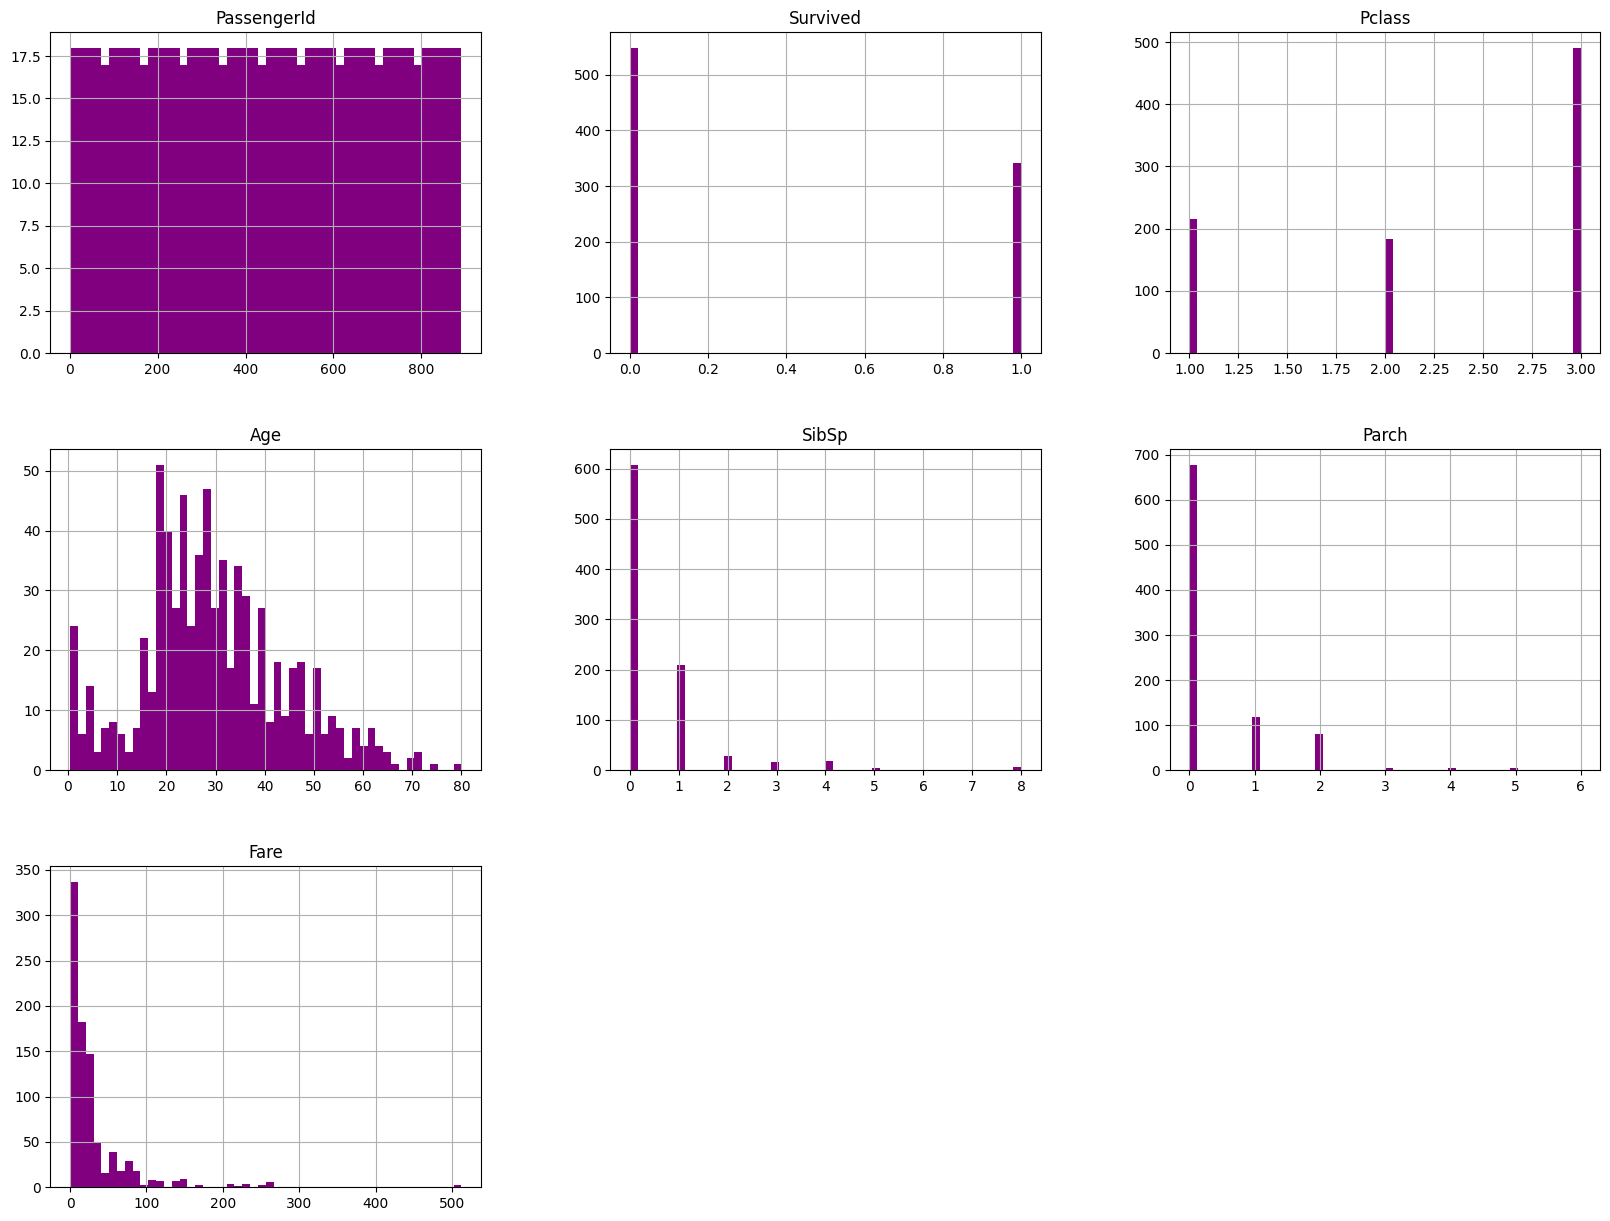

In [ ]:
train_set.hist(bins=50, figsize=(20, 15), color='purple')
plt.show()

### Correlação entre Variáveis

A análise de correlação é uma etapa essencial na exploração de dados, pois permite identificar o grau de relacionamento entre diferentes variáveis do conjunto. Esse tipo de análise ajuda a entender como as variáveis estão conectadas entre si e pode revelar padrões importantes.

Correlações mais fortes podem indicar possíveis influências ou dependências entre variáveis, sendo úteis para decisões em modelagem preditiva, seleção de atributos e interpretação dos dados. No contexto do Titanic, por exemplo, pode-se investigar se características como idade, classe social ou gênero têm relação com a taxa de sobrevivência.

In [ ]:
# Correlação das variáveis numéricas em relação ao atributo 'Survived'
correlation = numeric_features.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 



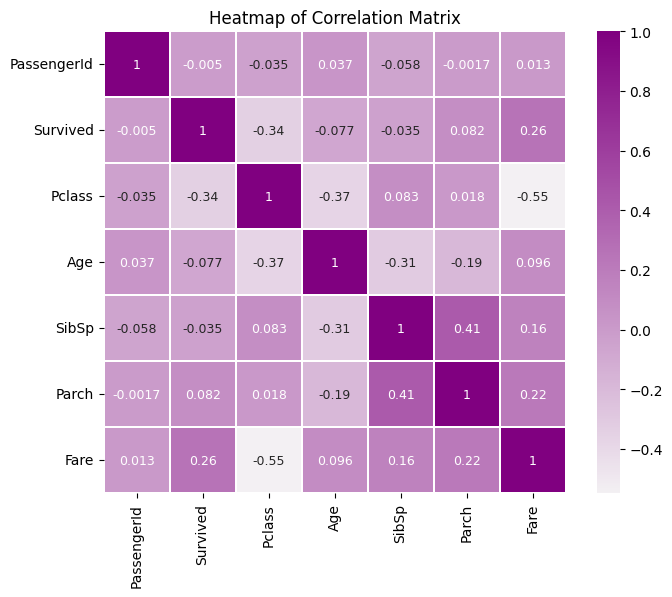

In [ ]:
# Mapa de calor da matriz de correlação entre todas as variáveis
cmap = sns.light_palette('purple', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Heatmap of Correlation Matrix')
plt.show()

A seguir, analisaremos a frequência de sobrevivência dos passageiros em relação à colunas relacionadas.

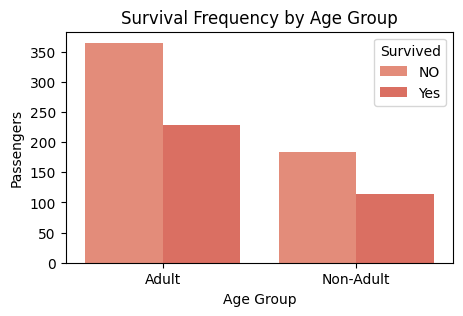

In [ ]:
# Criando um DataFrame para categorizar passageiros adultos e não adultos
train_set['AgeGroup'] = train_set['Age'].apply(lambda x: 'Adult' if x >= 18 and x<= 65 else 'Non-Adult')

# Configurando a paleta de cores
sns.set_palette('Reds_d')

# Plotando a frequência de sobrevivência por classes de idade
plt.figure(figsize=(5, 3))
sns.countplot(x='AgeGroup', hue='Survived', data=train_set)
plt.title('Survival Frequency by Age Group')

plt.xlabel('Age Group')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['NO', 'Yes'])

plt.show()
train_set = train_set.drop(['AgeGroup'], axis=1)

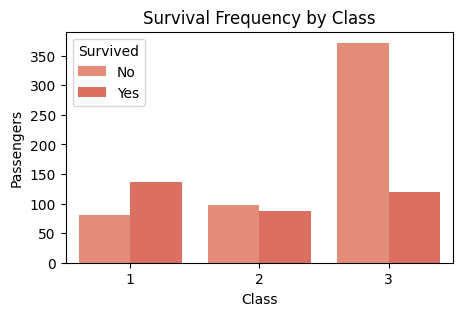

In [ ]:
# Gráfico de sobrevivência por classe social
plt.figure(figsize=(5, 3))
sns.countplot(x='Pclass', hue='Survived', data=train_set)
plt.title('Survival Frequency by Class')

plt.xlabel('Class')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

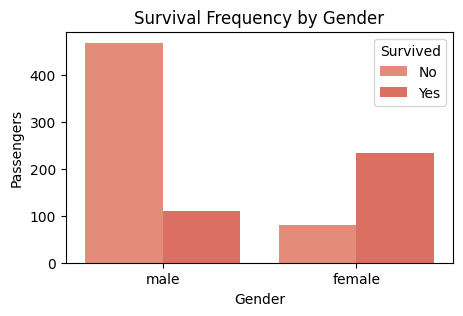

In [ ]:
# Gráfico de sobrevivência por sexo
plt.figure(figsize=(5, 3))
sns.countplot(x='Sex', hue='Survived', data=train_set)
plt.title('Survival Frequency by Gender')

plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

### Dados faltantes
#### A coluna Age apresenta 177 valores faltantes, indicando que uma quantidade significativa de passageiros não teve sua idade registrada. A coluna Cabin é a que apresenta o maior número de dados ausentes, com 687 valores faltantes, sugerindo que muitas cabines não foram registradas ou os passageiros não tinham uma cabine específica. A coluna Embarked possui apenas 2 valores faltantes, mostrando que a maioria dos passageiros tem o porto de embarque registrado.

In [ ]:
missing = train_set.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


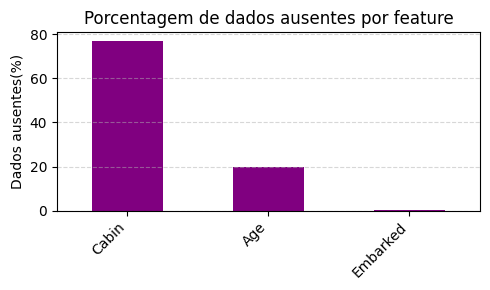

In [ ]:
missing = train_set.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(5, 3))
missing.plot(kind='bar', color='purple')
plt.ylabel('Dados ausentes(%)')
plt.title('Porcentagem de dados ausentes por feature')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Outliers

 Tratando Outliers

Outliers são pontos muito fora da curva (ex: o salário de um diretor vs. o de um estagiário).

 Por que se importar?

* Eles bagunçam a **média**.
* Eles confundem alguns modelos (como Redes Neurais), fazendo-os errar mais.
 A Regra de Ouro

Pergunte: **Este outlier é um erro ou um evento real?**

* **Se for um erro** (ex: idade = 200): corrija ou remova.
* **Se for um evento real** (ex: uma fraude, um dia de vendas da Black Friday): **mantenha!** É uma informação valiosa.

> Cuidar dos outliers cria um modelo mais confiável.

In [ ]:
def contar_outliers_iqr(df):
    """Calcula a quantidade de outliers para cada coluna numérica de um DataFrame."""
    outliers_dict = {}
    # Itera apenas sobre as colunas numéricas
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outliers_dict[col] = outlier_count

    return outliers_dict



In [ ]:
outliers = contar_outliers_iqr(train_set)

for key, value in outliers.items():
  print(f'{key}: {value}')

PassengerId: 0
Survived: 0
Pclass: 0
Age: 11
SibSp: 46
Parch: 213
Fare: 116


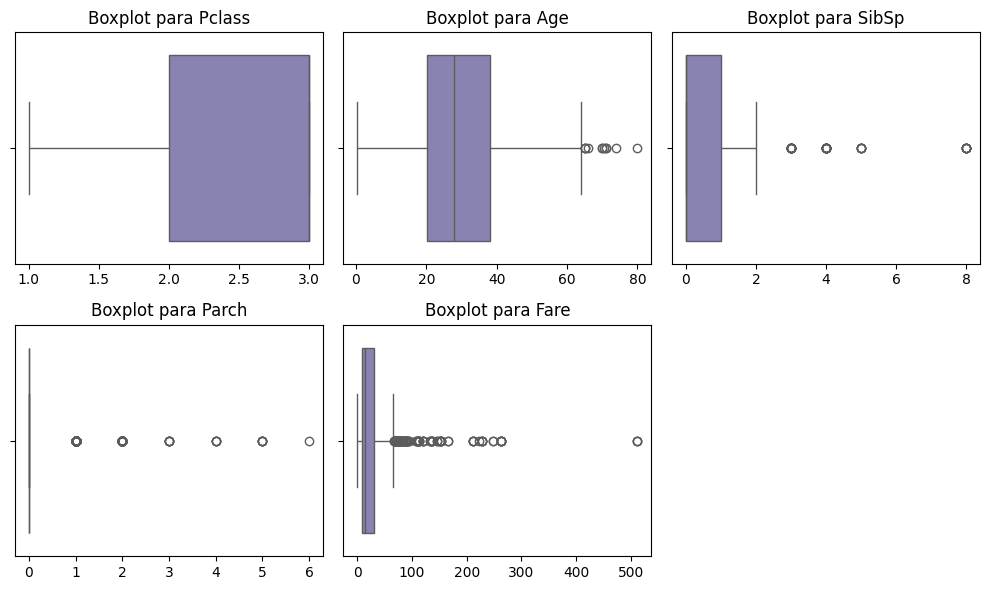

In [ ]:
# Lista de colunas que você deseja plotar ('Survived' foi removida)
cols_to_plot = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Cria a figura e a grade de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
flat_axes = axes.flatten()

# pega a cor da biblioteca
purple_color = sns.color_palette("Purples_d")[2]

# Itera sobre os eixos e colunas para criar os gráficos
for i, col in enumerate(cols_to_plot):
    ax = flat_axes[i]
    sns.boxplot(x=train_set[col], ax=ax, color=purple_color, whis=1.5)
    ax.set_title(f'Boxplot para {col}')
    ax.set_xlabel('')

# Esconde os eixos que não foram utilizados
for i in range(len(cols_to_plot), len(flat_axes)):
    flat_axes[i].set_visible(False)

# Ajusta o layout para que os títulos e gráficos não se sobreponham
plt.tight_layout()
plt.show()

## **Parte 2 - Pré-processamento de Dados**

Removendo campos nome, id, número da cabine e ticket. Esses dados não serão utilizados no treinamento.
Como grande parte dos valores da cabine não estão presentes, não faz sentido completar esses dados.

In [ ]:
dataset = train_set.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1)
dataset.head()
# y = dataset.iloc[:, 0].values
# X = dataset.iloc[:, 1:].values

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Dados Ausentes

É necessário completar os valores ausentes da idade, dado que é uma feature relevante para ser excluída do treinamento. A coluna idade apresenta 20% de valores ausentes. Também é preciso *completar* o local de embarque com a moda dos valores. Visto que é uma dado categórico.

In [ ]:
# Imputação da moda para a coluna 'Embarked' (se existir)
if 'Embarked' in dataset.columns:
    mode = dataset['Embarked'].mode()[0]
    dataset.fillna({'Embarked': mode}, inplace=True)

# Imputação da média na coluna 'Age'
age_mean = dataset['Age'].mean()
dataset.fillna({'Age': age_mean}, inplace=True)

### Tratamento de Outliers

In [ ]:
def tratar_features_numericas(df):
    """Aplica os tratamentos de outliers e transformações em um DataFrame."""
    df_tratado = df.copy()

    if 'Fare' in df_tratado.columns:
        df_tratado['Fare'] = np.log1p(df_tratado['Fare'])

    return df_tratado

In [ ]:
dataset = tratar_features_numericas(dataset)


In [ ]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values

###Codificação de Atributos



Codificação do gênero usando o Label Encoder dado que é binário

In [ ]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [ ]:
print(X[0, :])
print(X[:, 1])

[3 1 22.0 1 0 2.1102132003465894 'S']
[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0

Codificação usando OneHotEncoder para o porto de embarque

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Divisão dos dados




In [ ]:
X_not_survived = []
y_not_survived = []
X_survived = []
y_survived = []
for i in range(len(X)):
  if y[i] == 0:
    X_not_survived.append(X[i, :])
    y_not_survived.append(y[i])
  else:
    X_survived.append(X[i, :])
    y_survived.append(y[i])

X_not_survived = np.array(X_not_survived)
y_not_survived = np.array(y_not_survived)
X_survived = np.array(X_survived)
y_survived = np.array(y_survived)

### Dividindo os dados por classe

In [ ]:
print(len(X_not_survived))
print(len(y_not_survived))
print(len(X_survived))
print(len(y_survived))

549
549
342
342


In [ ]:
X_train_1, X_rest_1, y_train_1, y_rest_1 = train_test_split(
    X_not_survived,y_not_survived,
    train_size=0.5,
    random_state=1)

In [ ]:
X_train_2, X_rest_2, y_train_2, y_rest_2 = train_test_split(
    X_survived,y_survived,
    train_size=0.5,
    random_state=1)

In [ ]:
X_test_1, X_val_1, y_test_1, y_val_1 = train_test_split(
    X_rest_1,y_rest_1,
    train_size=0.5,
    random_state=1)

In [ ]:
X_test_2, X_val_2, y_test_2, y_val_2 = train_test_split(
    X_rest_2,y_rest_2,
    train_size=0.5,
    random_state=1)

In [ ]:
print(len(X_train_1))
print(len(X_train_2))

print(len(X_test_1))
print(len(X_test_2))

print(len(X_val_1))
print(len(X_val_2))

274
171
137
85
138
86


In [ ]:
X_train = np.concatenate((X_train_1, X_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

X_test = np.concatenate((X_test_1, X_test_2), axis=0)
y_test = np.concatenate((y_test_1, y_test_2), axis=0)

X_val = np.concatenate((X_val_1, X_val_2), axis=0)
y_val = np.concatenate((y_val_1, y_val_2), axis=0)


In [ ]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

445
222
224


### Igualando tamanho das classes

In [ ]:
# É necessário garantir o equilíbrio das classes para o conjunto de treino e de validação
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_val, y_val = ros.fit_resample(X_val, y_val)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

548
222
276


### Verificando se as classes estão devidamente equilibradas

In [ ]:
import pandas as pd
from collections import Counter

# Seu código para aplicar o RandomOverSampler:
# ros = RandomOverSampler(random_state=0)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# X_val, y_val = ros.fit_resample(X_val, y_val) # Assumindo que X_val e y_val estão definidos

print("--- Contagem de Classes Após Superamostragem ---")

# Para o conjunto de TREINO:
print("\nConjunto de Treino (y_train):")
if isinstance(y_train, (pd.Series, pd.DataFrame)):
    print(y_train.value_counts())
elif isinstance(y_train, np.ndarray):
    print(Counter(y_train))
else:
    print("Tipo de y_train não reconhecido para value_counts ou Counter.")

# Para o conjunto de VALIDAÇÃO (se aplicável):
# Se você realmente tem um X_val e y_val separados e os superamostrou, verifique-os:
if 'X_val' in locals() and 'y_val' in locals(): # Verifica se as variáveis existem
    print("\nConjunto de Validação (y_val):")
    if isinstance(y_val, (pd.Series, pd.DataFrame)):
        print(y_val.value_counts())
    elif isinstance(y_val, np.ndarray):
        print(Counter(y_val))
    else:
        print("Tipo de y_val não reconhecido para value_counts ou Counter.")
else:
    print("\nAs variáveis X_val e y_val não foram detectadas ou superamostradas neste contexto.")

print("\n--- Fim da Verificação ---")

--- Contagem de Classes Após Superamostragem ---

Conjunto de Treino (y_train):
Counter({np.int64(0): 274, np.int64(1): 274})

Conjunto de Validação (y_val):
Counter({np.int64(0): 138, np.int64(1): 138})

--- Fim da Verificação ---


### Normalização dos dados

In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## **Parte 3 - Treinamento utilizando MLP**

## Análise Experimental

Para treinar a Rede Neural utilizando o método MLPClassifier da biblioteca sklearn.neural_network, seguimos um processo estruturado que envolve as seguintes etapas principais:

- 🔹 Separação dos conjuntos de dados
- 🔹 Treinamento e teste do modelo
- 🔹 Validação final com o conjunto de teste original

### Separação dos Conjuntos

Inicialmente, realizamos a divisão do conjunto de treino (train_set) em:

- X_train e y_train — para o treinamento do modelo  
- X_test e y_test — para teste intermediário e avaliação de desempenho

O conjunto de teste original (test_set) é reservado para a **validação final**, permitindo avaliar a capacidade de generalização do modelo em dados nunca vistos.

## 🧠 Treinamento / Teste de Modelos

Para realizar uma análise abrangente dos dados, treinamos a Rede Neural utilizando diferentes arquiteturas e parâmetros do MLPClassifier da biblioteca sklearn.neural_network.

As principais variáveis ajustadas foram:

- **`hidden_layer_sizes`**: Número de neurônios nas camadas ocultas.  
  - *default = (100,)*

- **`activation`**: Função de ativação para a camada oculta:
  - identity: Função identidade, $f(x) = x$
  - logistic: Função sigmoide logística, $f(x) = \frac{1}{1 + e^{-x}}$
  - tanh: Tangente hiperbólica, $f(x) = \tanh(x)$
  - relu: Unidade linear retificada, $f(x) = \max(0, x)$

- **`solver`**: Algoritmo de otimização dos pesos:
  - lbfgs: Método Quasi-Newton
  - sgd: Gradiente Descendente Estocástico
  - adam: Otimizador adaptativo

- **`learning_rate`**: Taxa de aprendizagem usada para atualização dos pesos (default: constant)
  - constant: Taxa constante definida por learning_rate_init
  - invscaling: Taxa decrescente com o tempo:  
    $effective\_learning\_rate = \frac{learning\_rate\_init}{t^{power\_t}}$
  - adaptive: Mantém a taxa enquanto o erro estiver diminuindo; caso contrário, divide por 5

- **`alpha`**: Termo de regularização L2, que ajuda a evitar overfitting  
  - *default = 0.0001*

Esse processo permite a experimentação e o ajuste fino dos parâmetros para avaliar o desempenho da Rede Neural.

---

## Estratégia de Treinamento

A fim de entender melhor o comportamento dos modelos, podemos modificar um parâmetro por vez, na seguinte ordem:

- Função de ativação e otimizador  
- Taxa de aprendizagem  
- Alpha  
- Número de camadas escondidas  

São fixados os valores de alpha, hidden_layer_sizes e learning_rate para identificar quais configurações geram os melhores resultados.

---

## Avaliação de Desempenho

Para selecionar a métrica mais apropriada para avaliação da rede neural, consideramos:

### Acurácia
Proporção de previsões corretas em relação ao total de instâncias:

$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN} \tag{1}
$$

### Precisão
Capacidade de prever corretamente os positivos (evita falsos positivos):

$$
\text{Precisão} = \frac{TP}{TP + FP} \tag{2}
$$

### Recall
Capacidade de identificar todos os positivos reais (evita falsos negativos):

$$
\text{Recall} = \frac{TP}{TP + FN} \tag{3}
$$

### F1-Score
Média harmônica entre precisão e recall:

$$
F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}} \tag{4}
$$

---

> Embora a acurácia forneça uma visão geral do desempenho, ela pode ser **enganosa em conjuntos de dados desbalanceados**. Por isso, as métricas de **precisão, recall e F1-score** são especialmente importantes para avaliar a qualidade real das previsões.
Do conjunto de treino, temos:


In [ ]:
warnings.simplefilter('ignore', category=ConvergenceWarning)

# Parâmetros de função de ativação
lbfgs = {
    'identity': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='identity', solver='lbfgs', alpha=0.0001),
    'logistic': MLPClassifier(hidden_layer_sizes=(10,50), max_iter=1200, activation='logistic', solver='lbfgs', alpha=0.0001),
    'tanh': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='tanh', solver='lbfgs', alpha=0.0001),
    'relu': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='relu', solver='lbfgs', alpha=0.0001)
}

adam = {
    'identity': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='identity', solver='adam', alpha=0.0001),
    'logistic': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='logistic', solver='adam', alpha=0.0001),
    'tanh': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='tanh', solver='adam', alpha=0.0001),
    'relu': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='relu', solver='adam', alpha=0.0001)
}

sgd = {
    'identity': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='identity', solver='sgd', alpha=0.0001),
    'logistic': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='logistic', solver='sgd', alpha=0.0001),
    'tanh': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='tanh', solver='sgd', alpha=0.0001),
    'relu': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1200, activation='relu', solver='sgd', alpha=0.0001)
}

# Treinar modelos alternando a função de ativação
print('Solver - lbfgs')
print('-' * 50)
for function, mlp in lbfgs.items():
    # fold no dataset de validação
    X_val_chosen, X_val_discarded, y_val_chosen, y_val_discarded = train_test_split(
      X_val,y_val,
      train_size=0.75,
      random_state=1)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val_chosen)
    print(f'Function {function} accuracy: {accuracy_score(y_val_chosen, y_pred)}')
    print(f'Function {function} F1 Score: {f1_score(y_val_chosen, y_pred)}\n')
print()

print('Solver - sgd')
print('-' * 50)
for function, mlp in sgd.items():
    # fold no dataset de validação
    X_val_chosen, X_val_discarded, y_val_chosen, y_val_discarded = train_test_split(
      X_val,y_val,
      train_size=0.75,
      random_state=1)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val_chosen)
    print(f'Function {function} accuracy: {accuracy_score(y_val_chosen, y_pred)}')
    print(f'Function {function} F1 Score: {f1_score(y_val_chosen, y_pred)}\n')
print()

print('Solver - adam')
print('-' * 50)
for function, mlp in adam.items():
    # fold no dataset de validação
    X_val_chosen, X_val_discarded, y_val_chosen, y_val_discarded = train_test_split(
      X_val,y_val,
      train_size=0.75,
      random_state=1)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val_chosen)
    print(f'Function {function} accuracy: {accuracy_score(y_val_chosen, y_pred)}')
    print(f'Function {function} F1 Score: {f1_score(y_val_chosen, y_pred)}\n')
print()

Solver - lbfgs
--------------------------------------------------
Function identity accuracy: 0.7439613526570048
Function identity F1 Score: 0.7439613526570048

Function logistic accuracy: 0.855072463768116
Function logistic F1 Score: 0.8543689320388349

Function tanh accuracy: 0.7777777777777778
Function tanh F1 Score: 0.7788461538461539

Function relu accuracy: 0.7874396135265701
Function relu F1 Score: 0.7731958762886598


Solver - sgd
--------------------------------------------------
Function identity accuracy: 0.7632850241545893
Function identity F1 Score: 0.751269035532995

Function logistic accuracy: 0.5120772946859904
Function logistic F1 Score: 0.6773162939297125

Function tanh accuracy: 0.7632850241545893
Function tanh F1 Score: 0.7487179487179487

Function relu accuracy: 0.7584541062801933
Function relu F1 Score: 0.7448979591836735


Solver - adam
--------------------------------------------------
Function identity accuracy: 0.7439613526570048
Function identity F1 Score: 0.

In [ ]:
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes = (10, 10, 10), solver= 'adam', activation='relu').fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[114  23]
 [ 15  70]]


0.8288288288288288

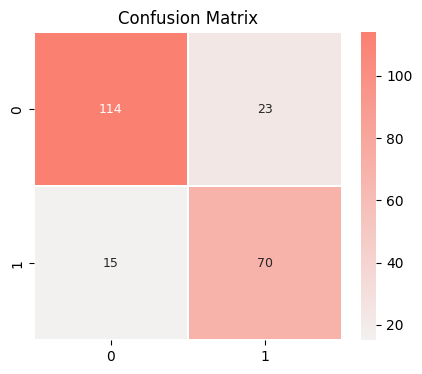

In [ ]:
cmap = sns.light_palette('salmon', as_cmap=True)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Certifique-se de que X_train e y_original são seus dados de treino e rótulos
# Se você já fez um train_test_split, estes são os dados para o K-Fold.
# Faça cópias para evitar modificações nos dados originais durante o loop.
X_train_original = X_train.copy()
y_original = y_train.copy()

# Configuração do K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
accuracies = []

# Loop pelos folds
for fold, (train_index, test_index) in enumerate(skf.split(X_train_original, y_original), start=1):
    # Separa os dados de treino e teste para o fold atual
    X_train_fold = X_train_original[train_index]
    X_test_fold = X_train_original[test_index]
    y_train_fold = y_original[train_index]
    y_test_fold = y_original[test_index]

    # Inicializa e treina o modelo MLP
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Avaliação do modelo
    y_pred = model.predict(X_test_fold)
    acc = accuracy_score(y_test_fold, y_pred)

    print(f"Fold {fold} - Acurácia: {acc:.4f}")
    print(classification_report(y_test_fold, y_pred))

    # Armazena a acurácia
    accuracies.append(acc)

# Resultados finais
print("\n--- Resultados Finais ---")
print(f"Acurácia Média em {k} Folds: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}")

Fold 1 - Acurácia: 0.7636
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        55
           1       0.75      0.78      0.77        55

    accuracy                           0.76       110
   macro avg       0.76      0.76      0.76       110
weighted avg       0.76      0.76      0.76       110

Fold 2 - Acurácia: 0.8636
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        55
           1       0.88      0.84      0.86        55

    accuracy                           0.86       110
   macro avg       0.86      0.86      0.86       110
weighted avg       0.86      0.86      0.86       110

Fold 3 - Acurácia: 0.7273
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        55
           1       0.73      0.73      0.73        55

    accuracy                           0.73       110
   macro avg       0.73      0.73      0.73       

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Definindo o Estimador Base
#    Criamos um modelo MLPClassifier base. Os parâmetros que queremos testar
#    serão definidos no grid.
mlp = MLPClassifier(max_iter=1000, random_state=42)


# 2. Definindo o Grid de Hiperparâmetros (param_grid)
#    Este dicionário contém todos os parâmetros que você quer testar.
#    GridSearchCV testará TODAS as combinações possíveis.
#    Adicionei mais alguns parâmetros para uma busca mais completa.
parameters = {
    'hidden_layer_sizes': [(50,50), (50, 50, 50), (50, 100), (10, 10, 10),],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# 3. Configurando o GridSearchCV
#    - estimator: o modelo base.
#    - param_grid: o dicionário com os parâmetros a testar.
#    - cv: o número de folds para a validação cruzada (StratifiedKFold é usado por padrão em classificadores).
#    - scoring: a métrica para avaliar o melhor modelo ('accuracy', 'f1_weighted', etc.).
#    - n_jobs=-1: usa todos os processadores disponíveis para acelerar a busca.
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=parameters,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 # Mostra o progresso do treinamento
)

# 4. Executando a Busca
#    O .fit() treina o modelo com todas as combinações de parâmetros e validação cruzada.
print("Iniciando a busca pelos melhores hiperparâmetros...")
grid_search.fit(X_train, y_train)


# 5. Analisando os Resultados
print("\n--- Resultados do GridSearchCV ---")

# Mostra os melhores parâmetros encontrados
print(f"Melhores Parâmetros: {grid_search.best_params_}")

# Mostra a melhor pontuação de acurácia durante a validação cruzada
print(f"Melhor Acurácia (CV): {grid_search.best_score_:.4f}")


# 6. Avaliando o Melhor Modelo no Conjunto de Teste
print("\n--- Avaliação do Melhor Modelo no Conjunto de Teste ---")
# O grid_search já retreina o melhor modelo (best_estimator_) com todos os dados de treino.
# Agora usamos ele para prever nos dados de teste que foram guardados.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Iniciando a busca pelos melhores hiperparâmetros...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

--- Resultados do GridSearchCV ---
Melhores Parâmetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Melhor Acurácia (CV): 0.8285

--- Avaliação do Melhor Modelo no Conjunto de Teste ---
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       137
           1       0.74      0.74      0.74        85

    accuracy                           0.80       222
   macro avg       0.79      0.79      0.79       222
weighted avg       0.80      0.80      0.80       222



In [ ]:
print("\n--- Treinando o Modelo Final com os Parâmetros Otimizados ---")

# 1. Extrair o dicionário com os melhores parâmetros encontrados
best_params = grid_search.best_params_
print(f"Parâmetros utilizados: {best_params}")

# 2. Criar uma nova instância do modelo com esses parâmetros
#    O operador ** descompacta o dicionário 'best_params' nos argumentos do MLPClassifier.
#    Adicionamos 'random_state' para garantir que o resultado seja sempre o mesmo.
final_model = MLPClassifier(random_state=42, **best_params)

# 3. Treinar (fit) o modelo final com o conjunto de treino COMPLETO
final_model.fit(X_train, y_train)

print("\nModelo final treinado com sucesso!")

# 4. Avaliar o desempenho do modelo final no conjunto de teste
print("\n--- Desempenho do Modelo Final no Conjunto de Teste ---")

# LINHA ESSENCIAL PARA CONECTAR O GRIDSEARCH AO PLOT:
y_pred_final = grid_search.best_estimator_.predict(X_test)

# Exibe o relatório de classificação e a acurácia
print(classification_report(y_test, y_pred_final))
print(f"Acurácia Final: {accuracy_score(y_test, y_pred_final):.4f}")


--- Treinando o Modelo Final com os Parâmetros Otimizados ---
Parâmetros utilizados: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}

Modelo final treinado com sucesso!

--- Desempenho do Modelo Final no Conjunto de Teste ---
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       137
           1       0.74      0.74      0.74        85

    accuracy                           0.80       222
   macro avg       0.79      0.79      0.79       222
weighted avg       0.80      0.80      0.80       222

Acurácia Final: 0.8018


In [ ]:
# 1. Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred_final)

# 2. Plotar a matriz de confusão
cmap = sns.light_palette('salmon', as_cmap=True)

plt.figure(figsize=(5, 4))

sns.heatmap(
    cm,
    square=True,
    cmap=cmap,
    annot=True,               # Exibir os números em cada célula
    annot_kws={'size': 12},   # Tamanho da fonte dos números
    linecolor='white',
    linewidths=0.1,
    fmt='d'                   # Formatar os números como inteiros
)

plt.title('Matriz de Confusão - Modelo Final Otimizado', fontsize=16)
plt.xlabel('Valores Previstos', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)
plt.show()

print(f"Acurácia Final: {accuracy_score(y_test, y_pred_final):.4f}")

.